Create a code iteration for predicting mnist data set. This is the second code iteration. Batch Normalization is introduced. Batchsize increased to 512. Architecture is also changed to get less than 15k parameters

***Observations:  ***

We got 14.632K parameters out of which 252 are non-trainable. 
Batch size is 512. 
We trained this network for 60 epochs.  Each epoc took around 3 sec to execute. 
Training loss is between 0.9932  and 0.00057546 . 
Validation loss is between 0.6484 and 0.0385.  
Training accuracy reached max of 100%. 
Validation accuracy achieved is lying between 78.86% to 99.19%. 

# **Import Libraries and modules**

**Download and install Keras**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


**Import mnist dataset, layers, utilities and data augmentation tools**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import optimizers

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Print Dimensions of the train dataset. And print first image from train dataset**

(60000, 28, 28)


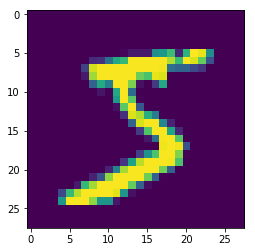

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshape data into (28,28,1) array**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

**Normalize Data**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Print Sample Data**

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Data Preprocessing - Define Data Augmentation Stratagy using ImageDataGenerator Class**

**Fits the data generator to some sample data.**

**Define a new architecture by using a sequential model.**

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 3X3
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24 5X5
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 22 7X7
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 20 9X9
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 18 11X11
model.add(BatchNormalization())



model.add(MaxPooling2D(pool_size=(2, 2))) # 9 22X22
model.add(Convolution2D(10, 1, 1, activation='relu')) #  7 24X24
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 5 26X26
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) #  3 28X28
model.add(BatchNormalization())



model.add(Convolution2D(16, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu')) 

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0

In [0]:
model.summary() ## create summary to see number of parameters are less than 20000

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 10)        1450      
__________

**Train the model training and validation sets**

In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=512, epochs=60, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 7s 108us/step - loss: 0.9932 - acc: 0.6913 - val_loss: 0.6484 - val_acc: 0.7886
Epoch 2/60
60000/60000 [==============================] - 3s 54us/step - loss: 0.1612 - acc: 0.9540 - val_loss: 0.1150 - val_acc: 0.9649
Epoch 3/60
60000/60000 [==============================] - 3s 54us/step - loss: 0.0882 - acc: 0.9748 - val_loss: 0.0900 - val_acc: 0.9722
Epoch 4/60
60000/60000 [==============================] - 3s 54us/step - loss: 0.0636 - acc: 0.9816 - val_loss: 0.0671 - val_acc: 0.9791
Epoch 5/60
60000/60000 [==============================] - 3s 55us/step - loss: 0.0510 - acc: 0.9851 - val_loss: 0.0543 - val_acc: 0.9824
Epoch 6/60
60000/60000 [==============================] - 3s 54us/step - loss: 0.0407 - acc: 0.9881 - val_loss: 0.0630 - val_acc: 0.9809
Epoch 7/60
60000/60000 [==============================] - 3s 55us/step - loss: 

In [0]:
y_pred = model.predict(X_test) ## use model to do prediction

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.17570350e-13 1.32161881e-09 2.29383298e-13 7.08748268e-11
  2.66298961e-09 1.37995925e-11 2.71812971e-20 1.00000000e+00
  7.07026342e-16 6.21749657e-12]
 [8.55169546e-15 8.98888386e-13 1.00000000e+00 2.37116153e-16
  2.51540727e-17 1.91565579e-20 1.40749652e-14 9.71386483e-18
  1.24257711e-12 1.82561798e-20]
 [2.16954403e-15 1.00000000e+00 1.00693711e-13 1.06815891e-16
  3.88705479e-13 3.18342184e-12 1.35817902e-11 5.98477179e-09
  1.08209503e-12 5.01166051e-14]
 [1.00000000e+00 1.26794439e-21 1.91154842e-10 1.42594473e-13
  1.65938166e-11 4.92726845e-13 2.19949170e-09 2.41928960e-12
  4.74241826e-11 2.60850217e-12]
 [1.45384362e-14 3.25960248e-17 9.50976680e-15 1.24760122e-21
  1.00000000e+00 1.22322345e-13 2.51519601e-17 1.01827097e-12
  1.87488848e-12 3.84956884e-08]
 [1.70635978e-16 1.00000000e+00 3.78438532e-14 1.56063091e-17
  6.56618043e-13 5.98658840e-12 7.08077737e-12 8.84748363e-09
  2.52955859e-12 1.54140600e-12]
 [8.41696245e-25 1.70489012e-10 5.77676131e-14 2.27477900e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored